In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Import Case Data
CaseData=pd.read_excel('Allegheny County cases.xlsx',sheet_name='Data').fillna(value=0)
CaseData.head()

,Date,Cumulative cases,New cases,Daily Growth Rate,Cumulative Hospitalizations,Cumulative deaths
0,2020-03-19,18,18,0.000000,0,0
1,2020-03-20,28,10,0.555556,5,1
2,2020-03-21,31,3,0.107143,5,1
3,2020-03-22,40,9,0.290323,5,1
4,2020-03-23,48,8,0.200000,6,1


In [3]:
#Add new computed columns
CaseData['Day-Month']=CaseData['Date'].dt.strftime('%d-%b')
CaseData['Moving Avg'] = CaseData.rolling(window=3)['New cases'].mean() #Add moving average
CaseData['% Change Hospitalizations']=CaseData['Cumulative Hospitalizations'].pct_change()
CaseData['New Deaths']=CaseData['Cumulative deaths'].diff()
CaseData['% Change Deaths']=CaseData['Cumulative deaths'].pct_change()
lastdate=CaseData[CaseData['Date']==CaseData['Date'].max()]['Day-Month'].values[0]
CaseData.head()

,Date,Cumulative cases,New cases,Daily Growth Rate,Cumulative Hospitalizations,Cumulative deaths,Day-Month,Moving Avg,% Change Hospitalizations,New Deaths,% Change Deaths
0,2020-03-19,18,18,0.000000,0,0,19-Mar,NaN,NaN,NaN,NaN
1,2020-03-20,28,10,0.555556,5,1,20-Mar,NaN,inf,1.0,inf
2,2020-03-21,31,3,0.107143,5,1,21-Mar,10.333333,0.0,0.0,0.0
3,2020-03-22,40,9,0.290323,5,1,22-Mar,7.333333,0.0,0.0,0.0
4,2020-03-23,48,8,0.200000,6,1,23-Mar,6.666667,0.2,0.0,0.0


In [4]:
# Set figure styles and fonts

sns.set_style('whitegrid')

titlefont={'fontsize':20,'fontweight' : 10}

### Are we flattening the curve ?

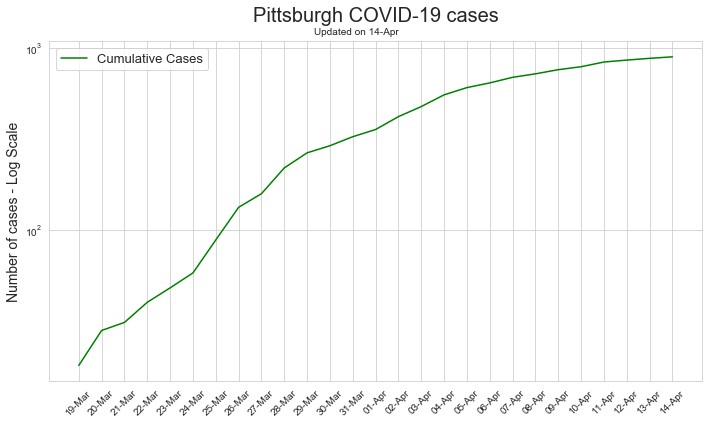

In [5]:
fig,ax=plt.subplots(figsize=(10,6))

ax.plot('Day-Month','Cumulative cases',data=CaseData,color='green',label ='Cumulative Cases')

plt.legend(loc='upper left',fontsize=13)

plt.yscale('log') # plot on log scale

plt.title('Pittsburgh COVID-19 cases',pad=20, fontdict=titlefont)

plt.ylabel('Number of cases - Log Scale',fontsize=14)

plt.xticks(rotation=45)

plt.figtext(0.5, 0.91, 'Updated on '+str(lastdate), horizontalalignment='center')

plt.tight_layout()

plt.savefig('Images\Cum cases log scale')

### Visualize growth of daily cases 

In [6]:
CaseData[CaseData['New cases']==CaseData['New cases'].max()]['Day-Month'].values[0]

'04-Apr'

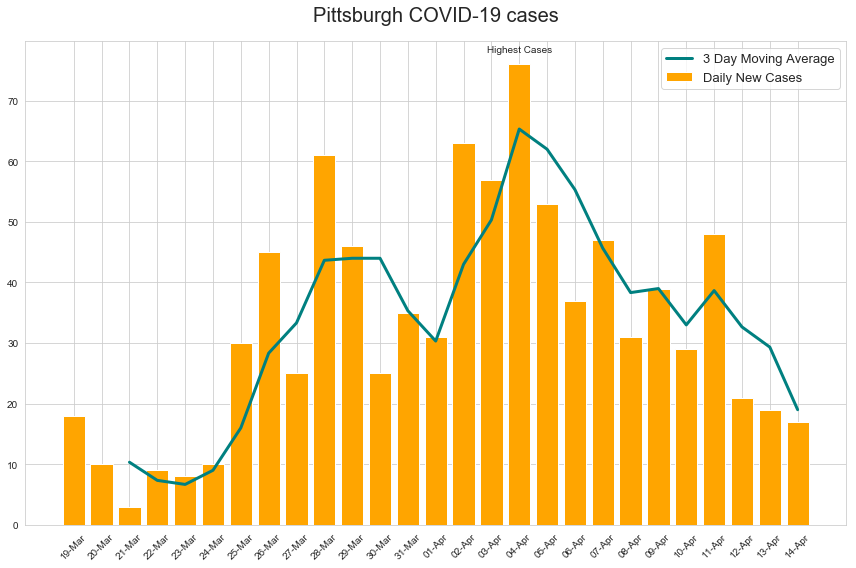

In [7]:
# Set figure size 
fig,ax=plt.subplots(figsize=(12,8))

#Plot new cases and moving average
ax.bar('Day-Month','New cases',data=CaseData,color='orange',label='Daily New Cases')

ax.plot('Day-Month','Moving Avg',data=CaseData, color='teal',label='3 Day Moving Average',linestyle='-',linewidth=3)

plt.title('Pittsburgh COVID-19 cases',pad=20, fontdict=titlefont)

plt.legend(fontsize=13)

MaxCases=CaseData['New cases'].max()
MaxCasesDate=CaseData[CaseData['New cases']==MaxCases]['Day-Month'].values[0]

plt.text(MaxCasesDate,MaxCases+2,"Highest Cases",horizontalalignment='center')

# Rotate x-labels
plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig('Images\Daily_Cases.jpeg')

### Analyze % change in hospitalizations vs new cases

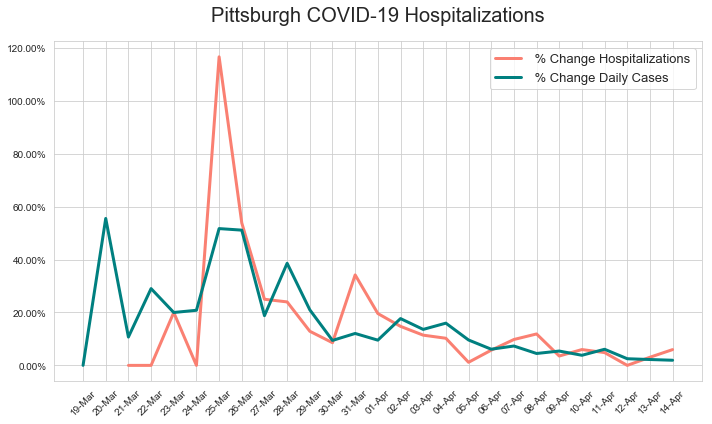

In [8]:
fig,ax=plt.subplots(figsize=(10,6))

#Plot hospitalizations

ax.plot('Day-Month','% Change Hospitalizations',data=CaseData, color='salmon',label=' % Change Hospitalizations',linestyle='-',linewidth=3)

ax.plot('Day-Month','Daily Growth Rate',data=CaseData, color='teal',label=' % Change Daily Cases',linestyle='-',linewidth=3)

#Convert y axis to percentage
y_value=['{:,.2f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.title('Pittsburgh COVID-19 Hospitalizations',pad=20, fontdict=titlefont)

plt.legend(fontsize=13)

# Rotate x-labels
plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig('Images\Pittsburgh Hospitalizations.jpeg')

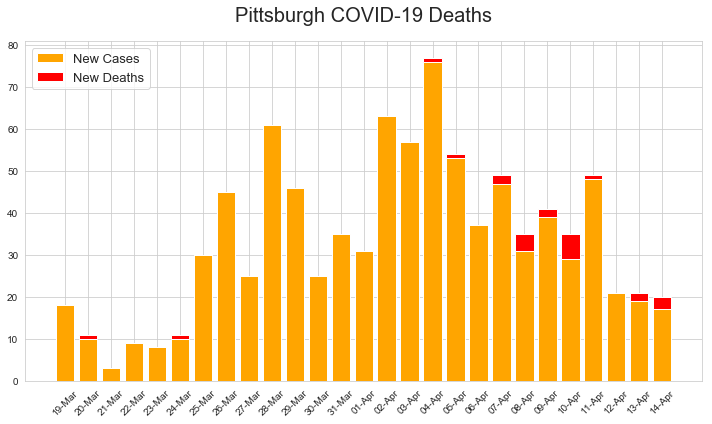

In [9]:
CaseData['Active Cases']=CaseData['Cumulative cases']-CaseData['Cumulative deaths']
fig,ax=plt.subplots(figsize=(10,6))

ax.bar('Day-Month','New cases',data=CaseData,color='orange',label='New Cases')

ax.bar('Day-Month','New Deaths',data=CaseData,color='red',label='New Deaths',bottom='New cases')

plt.title('Pittsburgh COVID-19 Deaths',pad=20, fontdict=titlefont)

plt.legend(loc='upper left',fontsize=13)

# Rotate x-labels
plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig('Images\Cases and deaths.jpeg')